# Name: Yifan Bai
# Email: yifan.bai@mail.mcgill.ca
# Group: 2
# McGill ID: 260562421

## Reading from data files: email, powergrid, protein

In [1]:
import numpy as np;

meta = np.loadtxt('../networks/metabolic.edgelist.txt').astype(np.int64)
power = np.loadtxt('../networks/powergrid.edgelist.txt').astype(np.int64)
protein = np.loadtxt('../networks/protein.edgelist.txt').astype(np.int64)

## Get adjacency matrices. No self-loop, multi-edge; undirected graphs used

DISCLAIMER: I followed the instructions word-by-word, and for some questions I went with my own interpretations while keeping original route for comparison purposes

In [2]:
def build_matrix(x):
    a = np.zeros((np.amax(x)+1, np.amax(x)+1))
    for i in range(len(x)):
        a[x[i][0]][x[i][1]] = 1
    # undirected
    for i in range(len(a)):
        for j in range(len(a)):
            if i == j:
                a[i][i] = 0
            elif a[i][j] != a[j][i]:
                a[i][j] = 1
                a[j][i] = 1
    return a

In [3]:
a_meta = build_matrix(meta)
a_power = build_matrix(power)
a_protein = build_matrix(protein)

In [4]:
def build_matrix_no_simp(x):
    a = np.zeros((np.amax(x)+1, np.amax(x)+1))
    for i in range(len(x)):
        a[x[i][0]][x[i][1]] = 1
    return a


In [5]:
a_meta_original = build_matrix_no_simp(meta)
a_power_original = build_matrix_no_simp(power)
a_protein_original = build_matrix_no_simp(protein)

# Question 1

## a) degree distribution

In [6]:
import matplotlib.pyplot as plt

In [7]:
def get_degree(a, m, begin, end):
    my_list = np.sort(np.sum(a, axis = 1)).tolist()
    freq = {}
    k = []
    v = []
    for items in my_list: 
        freq[items] = my_list.count(items) 
    for key, value in freq.items(): 
        k.append(key)
        v.append(value)
    v[:] = [x / sum(v) for x in v]
    x = np.log(k)
    y = np.log(v)
    fit = np.polyfit(x[begin:end], y[begin:end], m)
    print("Coefficients 'a' and 'b' for the linear equation y = ax + b: ", fit)
    print("Degree distribution")
    x2 = x[begin:end]
    y2 = fit[0] * x2 + fit[1]
    plt.plot(x, y)
    plt.plot(x2, y2)
    plt.show()

### Simplified graph

Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-2.83183691  2.88065408]
Degree distribution


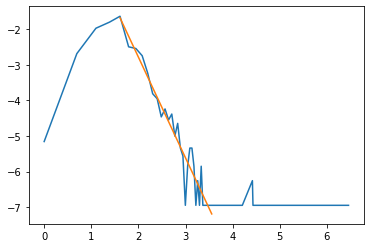

In [8]:
get_degree(a_meta, 1, 4, 31)

Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-2.54545078  0.54654605]
Degree distribution


/home/andybai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


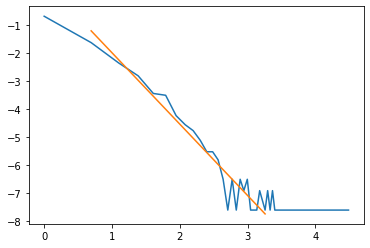

In [9]:
get_degree(a_protein,1, 2, 25)

Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-3.9535314   3.27040433]
Degree distribution


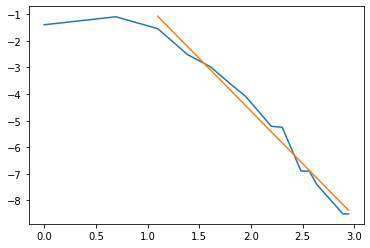

In [10]:
get_degree(a_power, 1,2,16)

### Original graph

Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-4.60809169  3.49206023]
Degree distribution


/home/andybai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


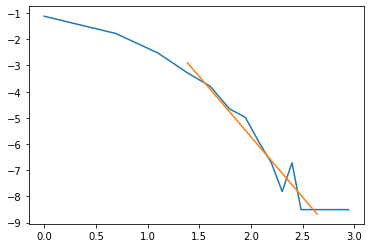

In [11]:
get_degree(a_power_original, 1, 4, 15)

Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-2.72861611  0.1674617 ]
Degree distribution


/home/andybai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


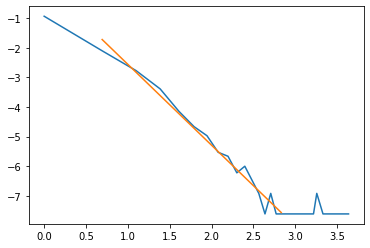

In [12]:
get_degree(a_protein_original, 1, 2, 17)

/home/andybai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Coefficients 'a' and 'b' for the linear equation y = ax + b:  [-2.98436132  2.34978742]
Degree distribution


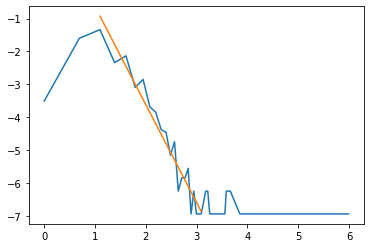

In [13]:
get_degree(a_meta_original, 1, 3, 23)

## b) custering coefficient distribution

In [14]:
def clustering_coeff(a):
    c_local = []
    a2 = a * a
    a3 = a2 * a
    a3_diag = np.diag(a3)
    trace = np.trace(a3)
    denom = np.sum(a2) - np.trace(a2)
    print("Total number triangles: ", trace/6)
    print("Global: ", trace/denom)
    degree = np.multiply(np.sum(a, axis = 0), np.sum(a, axis = 0) - 1)
    degree2 = np.multiply(np.sum(a, axis = 1), np.sum(a, axis = 1) - 1)
    for i in range(len(degree)):
        if degree[i] == 0:
            c_local.append(0)
        else:
            c_local.append(a3_diag[i]/degree[i])
    print("Clustering coefficient, first 10: ", c_local[0:10])
    print("Max clustering coefficient: ", max(c_local))
    print("Min clustering coefficient: ", min(c_local))
    plt.hist(a, bins='auto')
    plt.show()

We can see that since the matrices are so sparse, the diagonal of A^3 is a vector of zeros. This leans the clustering coefficients are zeros.

### Simplified graphs

Total number triangles:  0.0
Global:  0.0
Clustering coefficient, first 10:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max clustering coefficient:  0.0
Min clustering coefficient:  0.0


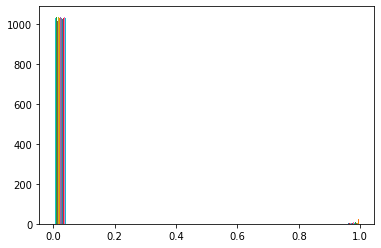

In [15]:
clustering_coeff(a_meta)

Total number triangles:  0.0
Global:  0.0
Clustering coefficient, first 10:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max clustering coefficient:  0.0
Min clustering coefficient:  0.0


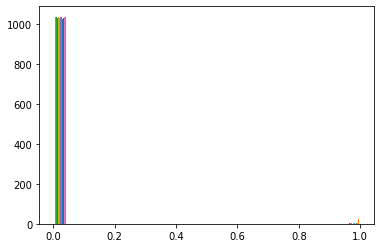

In [16]:
clustering_coeff(a_meta_original)

Total number triangles:  0.0
Global:  0.0
Clustering coefficient, first 10:  [0.0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0.0]
Max clustering coefficient:  0.0
Min clustering coefficient:  0.0


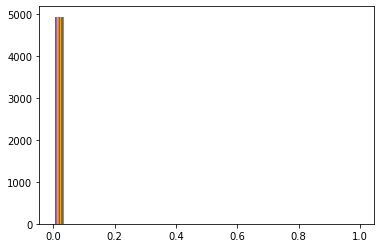

In [17]:
clustering_coeff(a_power)

### Original graphs

Total number triangles:  0.0
Global:  0.0
Clustering coefficient, first 10:  [0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0]
Max clustering coefficient:  0
Min clustering coefficient:  0


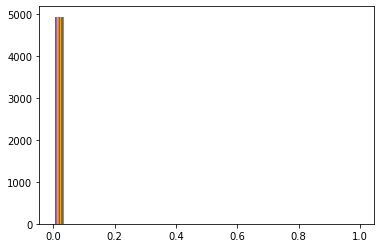

In [18]:
clustering_coeff(a_power_original)

Total number triangles:  0.0
Global:  0.0
Clustering coefficient, first 10:  [0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0]
Max clustering coefficient:  0
Min clustering coefficient:  0


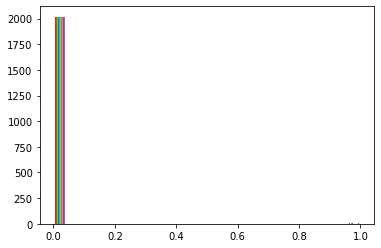

In [19]:
clustering_coeff(a_protein)

Total number triangles:  37.5
Global:  0.08317929759704251
Clustering coefficient, first 10:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max clustering coefficient:  0.5
Min clustering coefficient:  0


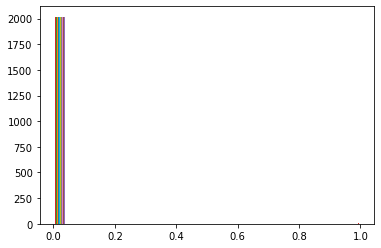

In [20]:
clustering_coeff(a_protein_original)

## For c) and d) I only did for the simplified graphs

## c) shortest paths distribution

In [21]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse.csgraph import depth_first_order

In [22]:
names = ['metabolism', 'powergrid', 'protein']
simplified = [a_meta, a_power, a_protein]
original = [a_meta_original, a_power_original, a_protein_original]

metabolism
Distribution vector:  [  0 496 499 ... 238 443 447]
Predecessors:  [589 589 589 ... 589 589 589]
Histograms for shortest path distributions and predecessors



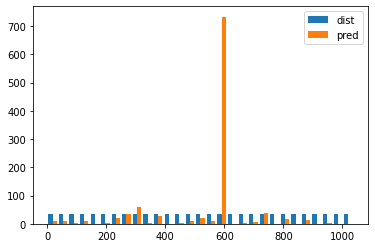

-----------------
powergrid
Distribution vector:  [   0  386  395 ... 4397 4350 4379]
Predecessors:  [ 395 3586 3583 ... 4929 4933  819]
Histograms for shortest path distributions and predecessors



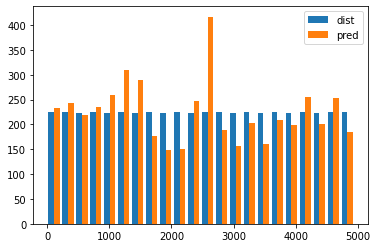

-----------------
protein
Distribution vector:  [   0 1050  362 ...  470 1003  116]
Predecessors:  [1050  229  229 ...  806 1982 1637]
Histograms for shortest path distributions and predecessors



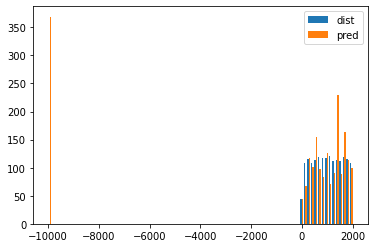

-----------------


In [23]:
for i in range(len(names)):
    graph = simplified[i]
    graph = csr_matrix(graph)
    dist_matrix = breadth_first_order(csgraph=graph, i_start=0)[0]
    predecessors = breadth_first_order(csgraph=graph, i_start=0)[1]
    predecessors[0] = breadth_first_order(csgraph=graph, i_start=1)[1][0]
    for j in range(len(predecessors)):
        if predecessors[j] == -9999:
            predecessors[j] = breadth_first_order(csgraph=graph, i_start=j+1)[1][j]
    
    print(names[i])
    print("Distribution vector: ", dist_matrix)
    print("Predecessors: ", predecessors)
    print("Histograms for shortest path distributions and predecessors\n")
    plt.hist([dist_matrix, predecessors], bins = 'auto', label=['dist', 'pred'])
    plt.legend(loc='upper right')
    plt.show()
    print("-----------------")
# dist_matrix, predecessors = shortest_path(csgraph=graph, directed=False, indices=0, return_predecessors=True)

## d) number of connected components

In [24]:
from scipy.sparse.csgraph import connected_components

In [25]:
for i in range(len(names)):
    graph = original[i]
    graph = csr_matrix(graph)
    dist_matrix = connected_components(csgraph=graph, directed=False, return_labels=True)[0]
    predecessors = connected_components(csgraph=graph, directed=False, return_labels=True)[1]
    print(names[i])
    print('Number of connected components: ', dist_matrix)
    print('Labels: ', predecessors)
    print('Fraction: ',len(np.unique(predecessors))/len(original[i]))
    print("-----------------")

metabolism
Number of connected components:  1
Labels:  [0 0 0 ... 0 0 0]
Fraction:  0.0009624639076034649
-----------------
powergrid
Number of connected components:  1
Labels:  [0 0 0 ... 0 0 0]
Fraction:  0.00020238818053025704
-----------------
protein
Number of connected components:  185
Labels:  [0 0 0 ... 0 0 0]
Fraction:  0.09167492566897918
-----------------


## e) eigenvalue distribution

Since we are working with undirected graphs, degree matrix is a diagonal matrix and we can take 'short cuts' to get the Laplacian matrix (L = D - A):

1) Take negative of A[i][j] where i !== j. 2) Direct subtract element wise on the diagonal

In [26]:
from scipy.sparse.linalg import eigs

In [27]:
def eigenvalues(a):
    l = np.zeros(np.shape(a))
    d_i = np.sum(a, axis = 0)
    for i in range(len(a)):
        for j in range(len(a)):
            if i == j:
                l[i][j] = d_i[i] - a[i][j]
            else:
                l[i][j] = -a[i][j]
    vals, vecs = eigs(l, k = 100)
    print("First 100 eigenvalues: \n", vals.real)
    print("Spectral Gap, smallest non-zero eigenvalue for the first 100: ", np.amin(vals.real))

In [28]:
eigenvalues(a_meta)

First 100 eigenvalues: 
 [639.00369299 461.00769966 300.01858498 253.03355538 244.01125795
 140.024371   113.19322153 105.95092568  99.97549584  85.83296667
  83.00698054  84.35134135  67.88033483  61.01881756  54.4144073
  52.3472176   47.95808529  40.31997677  38.7925341   35.82868185
  31.06574579  30.1137395   29.37276965  29.06534315  28.70100681
  28.23300288  27.37510699  27.15566935  26.49210695  25.4748767
  24.97782724  24.67568235  24.51124427  24.42283077  24.05954869
  23.92242291  23.81433488  23.27668833  22.53730101  22.35876669
  22.02287877  21.89057527  21.54350782  21.41948332  21.06071878
  20.85035686  20.48591237  20.37364865  20.05239133  19.71905362
  19.608905    19.00706007  18.93839974  18.73162569  18.48919392
  18.46049692  18.26619604  18.08695384  17.98476779  17.92699474
  17.83812291  17.69688457  17.51475483  17.46135429  17.30464392
  17.22318967  17.15326895  17.18294348  16.8673785   16.81628718
  16.74250819  16.49427838  16.45235344  16.42623394 

In [29]:
eigenvalues(a_power)

First 100 eigenvalues: 
 [20.10961638 19.12040004 15.53449922 15.09944316 15.06742763 14.36283872
 14.44031338 14.43826971 14.12174676 14.09434772 13.99260146 13.36898903
 13.24934523 13.21895354 13.10166182 13.10060907 12.67055292 12.62922198
 12.47916386 12.40992733 12.38069949 12.36199878 12.33621813 12.17672119
 12.19248363 12.19921282 12.07821727 11.76714754 11.69925684 11.60144844
 11.53268182 11.43900231 11.42075779 11.41498983 11.35582107 11.31966786
 11.2957789  11.29861273 11.20695083 11.18674019 11.17710596 11.17250185
 11.16586853 11.14390006 11.13337106 11.09830284 11.06712566 11.04864904
 10.92360037 10.8631632  10.72548644 10.62953864 10.60360614 10.55202785
 10.5228627  10.45082532 10.42190636 10.40841961 10.40272777 10.38225706
 10.35592678 10.33699412 10.33356385 10.31260832 10.27222366 10.23724402
 10.22183286 10.22740566 10.18366836 10.16249509 10.1238946  10.08133988
 10.03432053 10.02076735 10.01885597  9.96275101  9.9386608   9.87901416
  9.84340905  9.82809191  

In [30]:
eigenvalues(a_protein)

First 100 eigenvalues: 
 [90.17842632 82.0563165  80.93315955 51.06632128 45.00888074 43.24491536
 38.19367812 31.14190255 30.10368216 30.11833778 29.63420717 27.99609746
 27.73614027 27.05324546 24.97313848 24.81667957 24.28050261 22.22313349
 21.39642026 21.02771712 21.01576766 20.27860418 19.79652388 19.46455393
 19.04617627 18.64419499 18.14425632 17.27041702 17.11152025 16.6183426
 15.39546503 15.403596   15.19677793 15.16923845 15.07889447 14.49197983
 14.08251916 13.96831376 13.69029899 13.52937671 13.4864022  13.44390849
 13.34491274 13.33742644 13.16347371 13.10420386 12.99193218 12.92063607
 12.70616086 12.58772502 12.50077552 12.31368265 12.02925772 11.85780264
 11.57302397 11.4255173  11.35220868 11.31698276 11.29967868 11.26114023
 11.08161508 11.0742745  11.04384324 10.91230838 10.880104   10.86185407
 10.76025888 10.65170897 10.57400815 10.41047904 10.34391436 10.13549587
 10.08501948 10.05817254 10.02190807  9.96648631  9.87541734  9.82967164
  9.72664359  9.67526016  9

## f) degree correlations

In [31]:
from scipy.stats.stats import pearsonr 

If we keep the simplification stated above, the correlation would be 1. We can investigate how things look like without it.

In [32]:
def scatter(a):
    d_i = np.sum(a, axis = 0)
    d_j = np.sum(a, axis = 1)
    plt.scatter(d_i, d_j)
    print("Pearson Correlation Coefficient: ", pearsonr(d_i,d_j)[0])

### Simplified graphs

Pearson Correlation Coefficient:  1.0


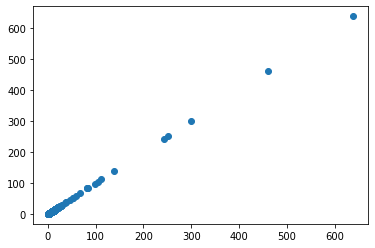

In [33]:
scatter(a_meta)

Pearson Correlation Coefficient:  1.0


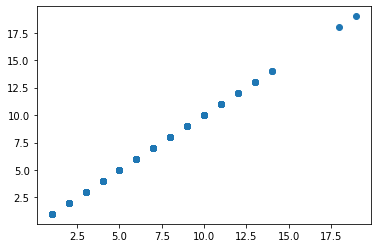

In [34]:
scatter(a_power)

Pearson Correlation Coefficient:  0.9999999999999999


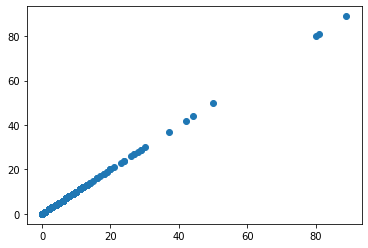

In [35]:
scatter(a_protein)

But it would be interesting to see what things are for the original graphs

### Original graphs

Pearson Correlation Coefficient:  0.6332477523312626


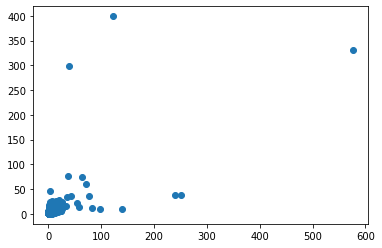

In [36]:
scatter(a_meta_original)

Pearson Correlation Coefficient:  -0.1770073443062277


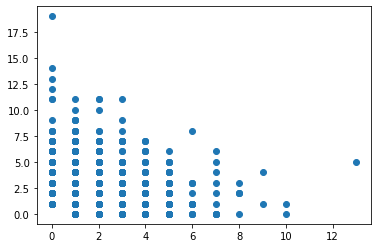

In [37]:
scatter(a_power_original)

Pearson Correlation Coefficient:  0.4064423366631729


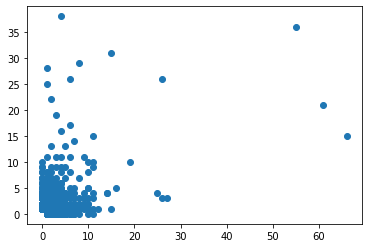

In [38]:
scatter(a_protein_original)

As we can see, they are clearly not correlated as before. The reason being that an undirected, self-loop free and single-edged graph is essentially a two-direction simple graph. This would make them to have benign behaviours.

## g) degree-clustering coefficient relation

In [39]:
def d_c(a):
    c_local = []
    a2 = a * a
    a3 = a2 * a
    a3_diag = np.diag(a3)
    degree = np.multiply(np.sum(a, axis = 0), np.sum(a, axis = 0) - 1)
    degree2 = np.multiply(np.sum(a, axis = 1), np.sum(a, axis = 1) - 1)
    for i in range(len(degree)):
        if degree[i] == 0:
            c_local.append(0)
        else:
            c_local.append(a3_diag[i]/degree[i])
    d_i = np.sum(a, axis = 0)
    plt.scatter(d_i,c_local)

From previous questions, we know that since the clusering coefficients are essentially zero, there would not be any 'definable' correlation.

### Simplified graphs

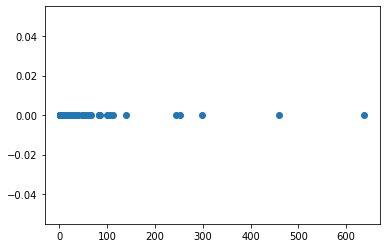

In [40]:
d_c(a_meta) # matabolism

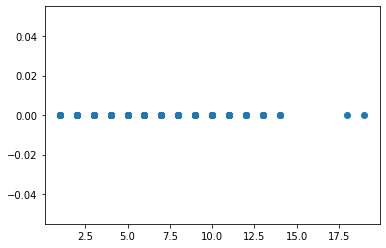

In [41]:
d_c(a_power)

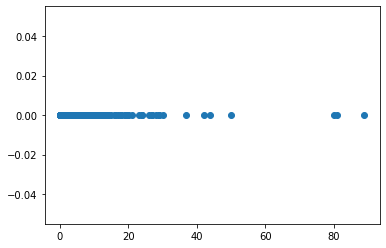

In [42]:
d_c(a_protein)

### Original graphs

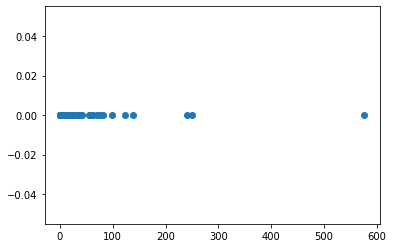

In [43]:
d_c(a_meta_original)

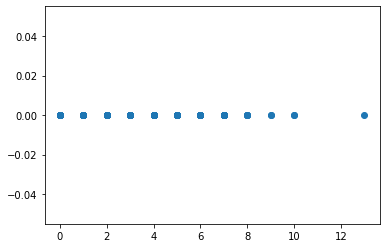

In [44]:
d_c(a_power_original)

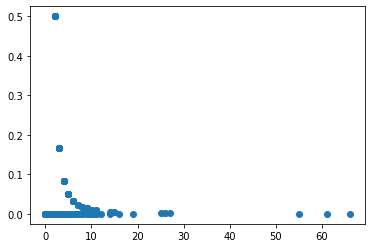

In [45]:
d_c(a_protein_original)

# Question 2

### Building Ajacency matrix with n x n shape: n^2 for filling in the entries, then for simplification, n^n access for modification. Therefore O(n^2)

a) Get sum: n operations, initializations: 1 operation, traverse through all sums to build key-value pairs: n operations. Therefore O(n^2)

b) Matrix multiplications: O(n^3), but could use some more advanced as here it is naive. All other operations are similar to the previous questions and are of O(n) or O(n^2). Taking the worst, O(n^3)

c) Since it is BFS/DFS based approach, we visit each node and the complexity is O(n + m) where m is the number of edges in the graph. In an undirected graph, the worst case, m = n(n-1)/2

d) Similar to c) the complexity is O(n + m) where m is the number of edges in the graph. In an undirected graph, the worst case, m = n(n-1)/2

e) To get Laplacian, we need O(n^2) for n x n matrices. Then for eigenvalue the best implementation is O(n^2.376). Taking the worst, O(n^2.376)

f) O(n) summations

g) O(n) for summation to get degree, O(n^3) in the clustering coefficient calculations. Taking the worst, O(n^3)